# Implement Trie (Prefix Tree)

A __trie__ (pronounced as "try") or prefix tree is a tree data structure used to efficiently store and retrieve keys in a dataset of strings. There are various applications of this data structure, such as autocomplete and spellchecker.

Implement the Trie class:

- `Trie()` Initializes the trie object
- `void insert(String word)` Inserts the string word into the trie
- `boolean startsWith(String prefix)` Returns `true` if there is a previously inserted string word that has the prefix `prefix`, and `false` otherwise.

#### Example

```
Input
["Trie", "insert", "search", "search", "startsWith", "insert", "search"]
[[], ["apple"], ["apple"], ["app"], ["app"], ["app"], ["app"]]
Output
[null, null, true, false, true, null, true]

Explanation
Trie trie = new Trie();
trie.insert("apple");
trie.search("apple");   // return True
trie.search("app");     // return False
trie.startsWith("app"); // return True
trie.insert("app");
trie.search("app");     // return True
```

## Theory

The __Trie data structure__ is a tree-like structure used for storing a dynamic set of strings. It allows for efficient __retrieval__ and __storage__ of keys, making it highly effective in handling large datasets. Trie supports operations such as __insertion__, __search__, __deletion__ of keys, and __prefix__ searches. 

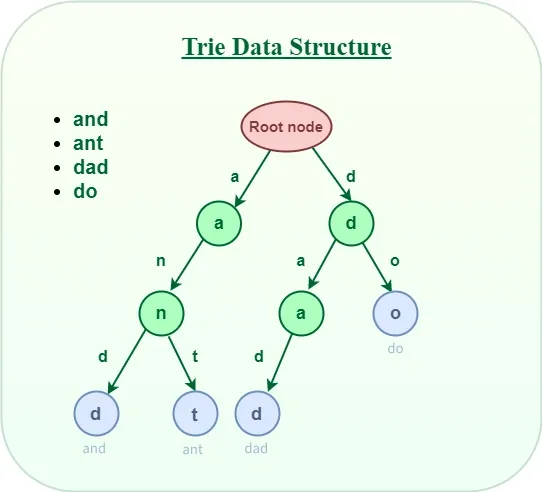

### Representation of Trie Node

- __Trie data structure__ consists of nodes connected by edges.
- Each node represents a character or part of a string.
- The root node acts as a starting point and does not store any character. 

In [2]:
class TrieNode:
    def __init__(self):
        self.children = [None] * 26
        self.isEndOfWord = False

### Insertion in Trie Data Structure - O(n) Time and O(n) Space

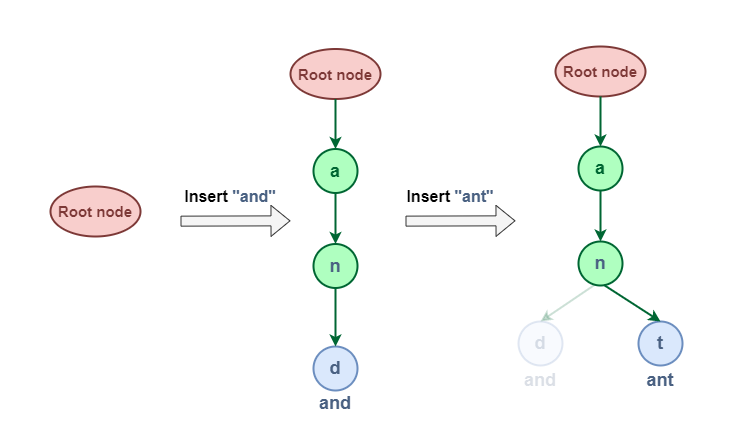

__Inserting "and" in Trie data structure:__

- __Start at the root node__: The root node has no character associated with it and its __wordEnd__ value is 0, indicating no complete word ends at this point. 
- __First character "a"__: Calculate the index using __'a' - 'a' = 0__. Check if the __child[0]__ is __null__. Since it is, create a new TrieNode with the character __"a"__, __wordEnd__ set to __0__, and an empty array of pointers. Move to this new node. 
- __Second character "n"__: Calculate the index using __'n' - 'a' = 13__. Check if __child[13]__ is __null__. It is, so create a new TrieNode with the character __"n"__, __wordEnd__ set to __0__, and an empty array of pointers. Move to this new node. 
- __Third character "d"__: Calculate the index using __'d' - 'a' = 3__. Check if __child[3]__ is __null__. It is so create a new TrieNode with the character __"d"__, __wordEnd__ set to __1__ (indicating the word __"and"__ ends here).


__Inserting "ant" in Trie data structure:__

- __Start at the root node__: Root node doesn't contain any data but it keep track of every first character of every string that has been inserted. 
- __First character "a"__: Calculate the index using __'a' - 'a' = 0__. Check if the __child[0]__ is __null__. We already have the __"a"__ node created from the previous insertion. So move to the existing __"a"__ node. 
- __Second character "n"__: Calculate the index using __'n' - 'a' = 13__. Check if __child[13]__ is __null__. It's not, so move to the existing __"n"__ node. 
- __Third character "t__: Calculate the index using __'t' - 'a' = 19__. Check if __child[19]__ is __null__. It is, so create a new TrieNode with the character __"t"__, __wordEnd__ set to __1__ (indicating the word "ant" ends here).

In [ ]:
# Method to insert a key into the Trie
def insert(root, key):
    
    # Initialize the curr pointer with the root node
    curr = root

    # Iterate across the length of the string
    for c in key:

        # Check if the node exists for the current character in the Trie
        index = ord(c) - ord('a')
        if curr.children[index] is None:

            # If node for current character does not exist. then make a new node
            new_node = TrieNode()

            # Keep the reference for the newly created node
            curr.children[index] = new_node
        
        # Move the curr pointer to the newly created node
        curr = curr.children[index]
    
    # Mark the end of the word 
    curr.isEndOfWord = True

trieRoot = TrieNode()
insert(trieRoot, 'and')

__Time Complexity__: O(n), where n is the length of the word to insert.

__Auxiliary Space__: O(n)

### Searching in Trie Data Structure - O(n) Time and O(1) Space

Searching for a key in Trie data structure is similar to its insert operation. However, it only __compares the characters and moves downs__. The search can terminate due to the end of a string or lack of key in the trie. 

Here's a visual representation of searching word __"dad"__ in Trie data structure:

Let's assume that we have successfully inserted the words __"and", "ant"__ and __"dad"__ into our Trie, and we have to search for specific words within the Trie data structure. Let's tru searching for the word __"dad"__:

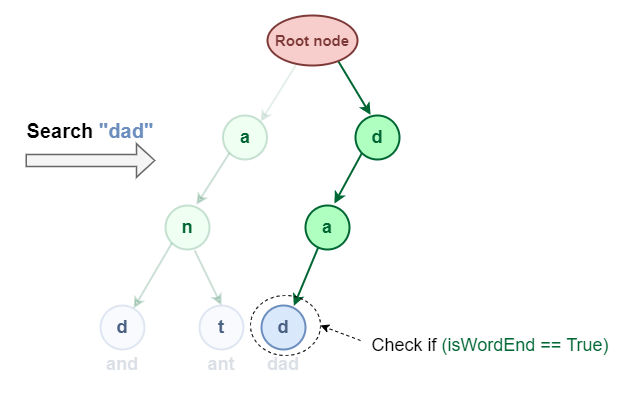

- We start at the root node.
- We follow the branch corresponding to the character 'd'.
- We follow the branch corresponding to the character 'a'.
- We follow the branch corresponding to the character 'd'.
- We reach the end of the word and __wordEnd__ flag is __1__.
- This means that __"dad"__ is present in the Trie.

In [ ]:
# Method to search a key in the Trie
def search(root, key):

    # Initialize the curr pointer with the root node
    curr = root

    # Interacting across the length of the string
    for c in key:

        # Check if the node exists for the current character in the Trie
        index = ord(c) - ord('a')
        if curr.children[index] is None:
            return False
        
        # Move the curr pointer to the already existing node for the current character
        curr = curr.children[index]
    
    # Return true if the word exists and is marked as ending
    return curr.isEndOfWord

trieRoot = TrieNode()
insert(trieRoot, 'and')
insert(trieRoot, 'ant')
insert(trieRoot, 'dad')
# Searching the 'dad' key in the Trie
search(trieRoot, 'dad')

True

### Prefix Searching in Trie Data Structure - O(n) Time and O(1) Space

Searching for a prefix in a Trie data structure is similar to searching for a key, but the search does not need to reach the end of the word. Instead, we stop as soon as we reach the end of the prefix or if any character in the prefix does not exist in the Trie.

Here's a visual representation of prefix searching for word __'da'__ in the Trie data structure:    

Let's assume that we have successfully inserted the words 'and', 'ant' and 'dad' into our Trie. Now, let's search for the prefix __'da'__ within the Trie data structure.

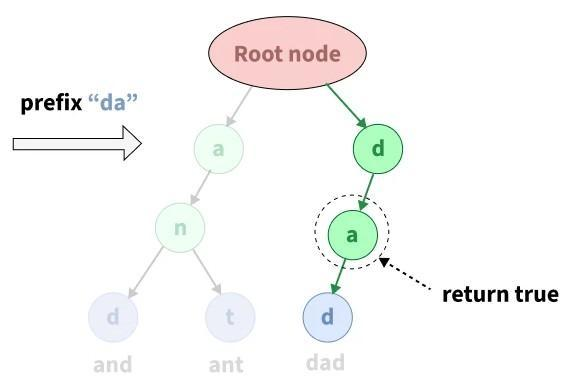

- We start at the root node.
- We follow the branch corresponding to the character 'd'.
- We move to the node corresponding to the character 'a'.
- We reach the end of the prefix "da". Since we haven't encountered any missing characters along the wau, we return `true`.

In [13]:
def is_prefix(root, key):
    current = root
    for c in key:
        index = ord(c) - ord('a')

        # If character does not exist, return false
        if current.children[index] is None:
            return False
        current = current.children[index]

    return True

__Time Complexity__: O(n), where n is the length of the word to search. 
__Auxiliary Space__: O(1)

# InstaByte Solution

To implement a Trie, we'll create a TrieNode class that represents each node in the Trie. Each node will have a dictionary to store its children nodes and a boolean flag to mark if its the end of a word.

For inserting a word, we traverse the trie, creating new nodes for characters that don't exist. When we reach the end of the word, we mark that node as an end node. 

For searching, we traverse the trie following the characters of the word. If we can't find a character or don't reach an end node, we return False.

For prefix searching, we just need to verify if we can traverse the trie following all characters in the prefix. 

Time complexity for all operations is __O(n)__ where n is the length of the word or prefix.

In [ ]:
class TrieNode:
    def __init__(self):
        # Dictionary to store child nodes
        self.children = {}
        # Flag to mark end of word
        self.is_end = False

class Trie:
    def __init__(self):
        # Initialize root node
        self.root = TrieNode()
    
    def insert(self, word:str) -> None:
        # Start from root node
        current = self.root
        # Traverse the trie
        for char in word:
            if char not in current.children:
                current.children[char] = TrieNode()
            current = current.children[char]
        # Mark the end of word
        current.is_end = True
    
    def search(self, word:str) -> bool:
        # Start from root node
        current = self.root
        # Traverse the trie
        for char in word:
            if char not in current.children:
                return False
            current = current.children[char]
        # Return whether this is end of a word
        return current.is_end
    
    def startsWith(self, prefix: str) -> bool:
        # Start from root node
        current = self.root
        # Traverse the trie
        for char in prefix:
            if char not in current.children:
                return False
            current = current.children[char]
        # Return True if prefix exists
        return True